<a href="https://colab.research.google.com/github/hyeonji826/AI/blob/main/AI%20Agent/2_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 랭그래프
랭그래프(LangGraph)는 LangChain 생태계에서 에이전트나 RAG 시스템을 단계별로 구성하고 실행할 수 있게 해주는 그래프 기반 오케스트레이션 프레임워크입니다. 기존 RAG가 직선형 파이프라인이었다면, 랭그래프는 노드(작업 단위)와 엣지(흐름)를 그래프 형태로 정의해 분기, 반복, 조건 처리, 에이전트 루프 같은 복잡한 흐름을 명확하게 표현하고 실행할 수 있습니다. 이를 통해 “검색 → 답변 생성 → 자기평가 → 재검색” 같은 Agentic RAG 워크플로우를 안정적으로 설계·관리할 수 있으며, 디버깅과 모니터링도 쉬워집니다.

<img src="https://blog.kakaocdn.net/dna/dCXdCS/btsQoqUWdVJ/AAAAAAAAAAAAAAAAAAAAABrGGXVai_cShdt1hTKc4kcVDpOgOtalk5mfXbfboWst/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=av38DkZxu04jWrqKJ7cI%2FMfnBSo%3D" width=800>

### 그래프 구조
그래프 구조(Graph Structure)는 객체(노드, vertex)와 그 객체들을 잇는 관계(간선, edge)로 표현되는 데이터 구조입니다. 노드는 개체를, 간선은 개체 간의 연결이나 관계를 나타내며, 방향성이 있는 경우 방향 그래프, 없는 경우 무방향 그래프로 구분됩니다. 이 구조는 복잡한 관계망을 직관적으로 표현하고 탐색할 수 있어, 소셜 네트워크 분석, 추천 시스템, 경로 탐색, 지식 그래프 등 다양한 분야에서 활용됩니다.

<img src="https://blog.kakaocdn.net/dna/83o32/btsQnVgI25k/AAAAAAAAAAAAAAAAAAAAAFK-jCWBYxG_A5y4uJ5N5RhJgXDaBvvy-T5ldB42oSol/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=PJ8%2FSWEdIpiac%2FqcJHkIHAmBGhI%3D" width=800>

## 2. 그래프

* 실제 세계의 현상이나 사물을 정점(Vertect) 또는 노드(Node)와 간선(Edge)으로 표현하기 위해 사용
* 노드 : 위치, 정점
* 간선 : 위치간의 관계를 표시한 선으로 노드를 연결한 선(line 또는 branch라고도 함)

### 1. 그래프 종류

* 무방향 그래프 : 방향이 없는 그래프, 간선을 통해 노드는 양방향으로 갈 수 있음

* 방향 그래프 : 간선에 방향이 있는 그래프, 보통 노드 A, B가 A -> B로 가는 간선으로 연결되어 있는 경우 <A,B>로 표기

* 가중치 그래프 : 간선에 비용 또는 가중치가 할당된 그래프

*  연결 그래프 : 무방향 그래프에 있는 모든 노드에 대해 항상 경로가 존재하는 경우

* 비연결 그래프 : 무방향 그래프에서 특정 노드에 대해 경로가 존재하지 않는 경우

* 순환 그래프 : 단순 경로의 시작 노드와 종료 노드가 동일한 경우
* 비순환 그래프 : 사이클이 없는 그래프

### 2. 그래프와 트리의 차이
<div style="text-align:left">
<table>
  <tr>
    <th></th>
    <th style="text-align:center">그래프</th>
    <th style="text-align:center">트리</th>
  </tr>
  <tr>
    <td style="text-align:center">정의</td>
    <td style="text-align:left">노드와 노드를 연결하는 간선으로 표현되는 자료 구조</td>
    <td style="text-align:left">그래프의 한 종류, 방향성이 있는 비순환 그래프</td>
  </tr>
  <tr>
    <td style="text-align:center">방향성</td>
    <td style="text-align:left">방향 그래프, 무방향 그래프 둘다 존재함</td>
    <td style="text-align:left">방향 그래프만 존재함</td>
  </tr>
  <tr>
    <td style="text-align:center">사이클</td>
    <td style="text-align:left">사이클 가능함, 순환 및 비순환 그래프 모두 존재함</td>
    <td style="text-align:left">비순환 그래프로 사이클이 존재하지 않음</td>
  </tr>
  <tr>
    <td style="text-align:center">루트 노드</td>
    <td style="text-align:left">루트 노드 존재하지 않음</td>
    <td style="text-align:left">루트 노드 존재함</td>
  </tr>
  <tr>
    <td style="text-align:center">부모/자식 관계</td>
    <td style="text-align:left">부모 자식 개념이 존재하지 않음</td>
    <td style="text-align:left">부모 자식 관계가 존재함</td>
  </tr>
</table>
</div>

### 3. 너비 우선 탐색
* BFS(Breadth-First Search) : 대표적인 그래프 탐색 알고리즘

* 정점들과 같은 레벨에 있는 노드들(형제 노드들)을 먼저 우선 탐색하는 방식

* 한 단계씩 내려가면서 해당 노드와 같은 레벨에 있는 노드들을 먼저 순회

<img src="https://blog.kakaocdn.net/dna/clo8B4/btsQqrFlt0N/AAAAAAAAAAAAAAAAAAAAAIM6kkxmt0sEJITmmLcF08Qz0PNINu4nEjwFcBC1SSR3/img.gif?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=wB1mcnmHkyf3pFFnmNx9jfiEQhw%3D" width=600>

<img src="https://blog.kakaocdn.net/dna/ciFIqZ/btsQmTjqAZ5/AAAAAAAAAAAAAAAAAAAAABx75zqsfTUU3D064o-LNe2cTkgDe2T7DvzxB0Gib0yu/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=yX%2BDDTATA9AuSHl5mL0JCgryJWk%3D" width=800>


```
graph = dict()
graph['A'] = ['B', 'C']
graph['B'] = ['A', 'D']
graph['C'] = ['A', 'G', 'H', 'I']
graph['D'] = ['B', 'E', 'F']
graph['E'] = ['D']
graph['F'] = ['D']
graph['G'] = ['C']
graph['H'] = ['C']
graph['I'] = ['C', 'J']
graph['J'] = ['I']

```
<img src="https://blog.kakaocdn.net/dna/k6AYN/btsQmXMQTaO/AAAAAAAAAAAAAAAAAAAAAFJDsdgF-ooMHbPQogqeEIZivpX3SRrXUSnIloo3Yrm_/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=HGQ9Bg9TOzkswEhJ1l0ppRDyjQw%3D">

<img src="https://blog.kakaocdn.net/dna/cT3NIc/btsQnDAAcBW/AAAAAAAAAAAAAAAAAAAAAIVIcYBmqI8TAaN7VYVG1-ESaeXlPph4bm3WfTX5H-xl/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=6PCp%2FVzzdFeYUay1mpyuZp8nRoM%3D">



In [ ]:
graph = dict()
graph['A'] = ['B', 'C']
graph['B'] = ['A', 'D']
graph['C'] = ['A', 'G', 'H', 'I']
graph['D'] = ['B', 'E', 'F']
graph['E'] = ['D']
graph['F'] = ['D']
graph['G'] = ['C']
graph['H'] = ['C']
graph['I'] = ['C', 'J']
graph['J'] = ['I']

In [ ]:
graph

{'A': ['B', 'C'],
 'B': ['A', 'D'],
 'C': ['A', 'G', 'H', 'I'],
 'D': ['B', 'E', 'F'],
 'E': ['D'],
 'F': ['D'],
 'G': ['C'],
 'H': ['C'],
 'I': ['C', 'J'],
 'J': ['I']}

### 방문했던 리스트
```A B C D E F G H I J ```

### 방문해야할 리스트

```
{'A': ['B', 'C'],
 'B': ['A', 'D'],
 'C': ['A', 'G', 'H', 'I'],
 'D': ['B', 'E', 'F'],
 'E': ['D'],
 'F': ['D'],
 'G': ['C'],
 'H': ['C'],
 'I': ['C', 'J'],
 'J': ['I']}
```

In [ ]:
def bfs(graph, start_node):
    visited,need_visit = list(),list()
    need_visit.append(start_node)

    while need_visit:
        node = need_visit.pop(0)
        if node not in visited:
            visited.append(node)
            need_visit.extend(graph[node])
    return visited

In [ ]:
bfs(graph, 'A')

['A', 'B', 'C', 'D', 'G', 'H', 'I', 'E', 'F', 'J']

## 3. 랭그래프의 필수 구성요소

### 1. 노드(Node)
노드는 LangGraph 워크플로우 안에서 실행되는 개별 작업 단위입니다. 예를 들어 “질문을 임베딩하기”, “벡터DB에서 관련 문서 검색하기”, “LLM으로 답변 생성하기” 같은 단계가 각각 하나의 노드가 됩니다. 즉, 노드는 전체 워크플로우를 이루는 핵심 블록이라고 할 수 있습니다.

### 2. 엣지(Edge)
엣지는 노드와 노드를 연결하는 흐름을 의미합니다. 한 노드의 결과가 다음 노드의 입력으로 이어지도록 만들어 주며, 워크플로우가 순차적으로 진행될 수 있게 합니다. 예를 들어 “검색 결과 → 답변 생성” 같은 연결이 엣지입니다.

### 3. 상태(State)
상태는 워크플로우 실행 중 유지되고 공유되는 데이터 저장소와 같습니다. 사용자 질문, 검색 결과, 현재까지의 답변 초안 등이 상태에 담겨 각 노드가 읽고 쓸 수 있습니다. 이 덕분에 그래프 전체가 일관된 맥락을 유지할 수 있습니다.

### 4. 조건 분기와 루프(Flow Control)
조건 분기는 특정 상황에 따라 워크플로우의 진행 경로를 바꾸는 기능입니다. 예를 들어 “검색 결과가 충분하면 답변 생성, 부족하면 재검색” 같은 분기 처리가 가능합니다. 루프는 특정 단계를 반복 실행하도록 해주며, 답변이 불충분할 경우 재검색-재생성을 반복하는 Agentic RAG 같은 구조를 구현할 수 있게 합니다.



👉 이렇게 네 가지 구성요소(노드, 엣지, 상태, 조건 분기·루프)가 맞물려 LangGraph는 단순한 RAG부터 복잡한 Agentic RAG까지 유연하게 표현할 수 있는 강력한 워크플로우 프레임워크가 됩니다.

## 4. 상태
State는 에이전트가 현재 어떤 정보를 가지고 있는지를 표현하는 데이터 구조로, 파이썬에서는 TypedDict나 Pydantic BaseModel을 사용해 정의할 수 있습니다. TypedDict는 단순히 키와 값의 타입을 명시하는 수준이라 잘못된 타입이 들어가도 실행은 되지만, 타입 검사기(mypy 등)에서만 잡아줍니다. 반면 Pydantic BaseModel은 실제 실행 시점에 타입을 엄격하게 검사하여 잘못된 데이터가 들어오면 오류를 발생시킵니다. 따라서 State를 정의할 때는 상황에 따라 단순히 구조만 명시할 것인지, 혹은 런타임에서 데이터 유효성까지 보장할 것인지를 고려해 TypedDict와 Pydantic을 선택하여 활용합니다.

In [ ]:
from typing import TypedDict

class User(TypedDict):  # 타입을 고정하는건 아님!
    id: int
    name: str
    email: str

user1: User = {
    'id': 1,
    'name': '김사과',
    'email': 'apple@apple.com'
}
print(user1)

{'id': 1, 'name': '김사과', 'email': 'apple@apple.com'}


In [ ]:
user1: User = {
    'id': 1,
    'name': 12345678,
    'email': 'apple@apple.com'
}
print(user1)

{'id': 1, 'name': 12345678, 'email': 'apple@apple.com'}


In [ ]:
from pydantic import BaseModel

class User(BaseModel):
    id: int
    name: str
    email: str

user_data = {
    'id': 1,
    'name': '김사과',
    'email': 'apple@apple.com'
}

user1 = User(**user_data)   # 딕셔너리에 접근해서 각각의 키와 값을 변수로 처리
print(user1)

id=1 name='김사과' email='apple@apple.com'


In [ ]:
# 타입이 안맞기때문에 에러가 분명히 난다.
user_data = {
    'id': 1,
    'name': 12345678,
    'email': 'apple@apple.com'
}

user = User(**user_data)
print(user)

ValidationError: 1 validation error for User
name
  Input should be a valid string [type=string_type, input_value=12345678, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type

> State는 입력과 출력의 스키마를 정의하고 이를 업데이트하는 리듀서 함수와 함께 사용됩니다. LangGraph에서는 TypedDict 등을 이용해 입력과 출력 상태를 명확히 정의하고, 각 노드가 상태를 받아 새로운 값을 반환하면 그래프가 이를 이어받아 전체 흐름을 완성합니다. 즉, State는 질문과 답변 같은 에이전트의 맥락 정보를 구조적으로 관리하며, 노드 실행 결과를 반영해 에이전트의 상태를 단계적으로 업데이트하는 핵심 역할을 합니다.

In [ ]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 16.0 MB/s eta 0:00:00


In [ ]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [ ]:
# 입력을 위한 스키마 정의
class InputState(TypedDict):
    question: str


# 출력을 위한 스키마 정의
class OutputState(TypedDict):
    answer: str


# 입력과 출력을 합한 종합 스키마 정의
class OverallState(InputState, OutputState):
    pass

In [ ]:
# 입력을 처리하고 답변을 생성하는 노드 정의
def answer_node(state: InputState):
    return {"answer": "bye", "question": state["question"]} # 상태 업데이트

In [ ]:
graph_builder = StateGraph(OverallState, input_schema=InputState, output_schema=OutputState)
graph_builder.add_node(answer_node)  # 답변 노드 추가
graph_builder.add_edge(START, "answer_node")  # 시작 엣지 추가
graph_builder.add_edge("answer_node", END)  # 끝 엣지 추가
graph = graph_builder.compile()  # Compile the graph

In [ ]:
# 입력 invoke 및 결과 출력
print(graph.invoke({"question": "hi"}))

{'answer': 'bye'}


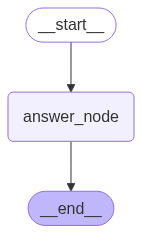

In [ ]:
graph

> State는 에이전트가 사용하는 데이터 구조로, 단순히 값만 담는 것이 아니라 값이 어떻게 업데이트될지(리듀서 함수)까지 함께 정의할 수 있습니다. 기본 TypedDict를 사용하면 단순히 키와 값의 타입만 지정하지만, Annotated와 리듀서 함수를 함께 쓰면 상태 업데이트 시 단순 덮어쓰기 대신 지정된 동작(예: add로 리스트 이어 붙이기, add_messages로 대화 메시지 누적하기)을 수행합니다. 즉, State는 에이전트의 현재 정보를 표현할 뿐 아니라, 노드 실행 결과가 기존 상태와 어떻게 병합·갱신될지를 규칙으로 내장한 확장된 상태 관리 구조입니다.

In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
    value1: int
    value2: list[str]

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from operator import add

class State(TypedDict):
    value1: int
    value2: Annotated[list[str], add]

In [ ]:
from typing_extensions import Annotated
from typing_extensions import TypedDict

def add(left, right):
    # 만약 State안에 함수를 콜백으로 등록해놓으면 문자열로 들어왔을 때, 계속 연산해줄 수 있다.
    return left + right

class State(TypedDict):
    value1: int
    value2: Annotated[list[str], add]

In [ ]:
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import TypedDict

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

## 5. 노드
노드(Node)는 에이전트가 실제로 수행해야 할 논리나 작업을 구현한 함수이며, 그래프 안에서 상태(State)를 입력받아 새로운 값이나 업데이트를 반환하는 단위입니다. LangGraph에서는 add_node("노드이름", 함수) 형태로 노드를 등록하며, 각 노드는 입력 상태를 받아 특정 로직을 실행한 뒤 상태에 반영할 딕셔너리를 반환합니다. 이렇게 정의된 노드들은 그래프의 흐름 속에서 순차적으로 연결되어 실행되며, 에이전트가 질문에 답하거나 결과를 가공하는 등의 역할을 수행합니다.

In [ ]:
from langgraph.graph import StateGraph

builder = StateGraph(dict)

def my_node(state: dict):
    return {"results": f"Hello, {state['input']}!"}

def my_other_node(state: dict):
    return state

builder.add_node("my_node", my_node)
builder.add_node("other_node", my_other_node)

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from operator import add

class State(TypedDict):
    messages: Annotated[list[str], add]

graph = StateGraph(State)

In [ ]:
def chatbot(state: State):
    answer = "안녕하세요! 무엇을 도와드릴까요?"
    print("Answer : ", answer)

    return {"messages": [answer]}

graph.add_node("chatbot", chatbot)

In [ ]:
graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)
graph = graph.compile()

graph.invoke({"messages": ["안녕!"]})

Answer :  안녕하세요! 무엇을 도와드릴까요?


{'messages': ['안녕!', '안녕하세요! 무엇을 도와드릴까요?']}

## 6. 엣지
엣지(Edges)는 그래프에서 노드 간의 실행 흐름을 연결하는 경로로, 에이전트가 어떤 순서로 작업을 이어갈지를 정의합니다. 가장 단순한 형태인 기본 엣지(Normal Edge)는 특정 노드가 끝나면 곧바로 다음 노드로 이동하도록 설정하며, graph.add_edge("node_a", "node_b")와 같이 사용합니다. 반면 조건부 엣지(Conditional Edge)는 라우팅 함수를 통해 현재 상태나 결과를 검사한 뒤, 조건에 따라 다른 노드로 분기시켜 실행 흐름을 유연하게 제어합니다. 즉, 엣지는 그래프에서 “다음에 무엇을 할지”를 결정짓는 연결선 역할을 하며, 조건을 두어 에이전트의 실행 경로를 동적으로 설계할 수 있게 합니다.

<img src="https://blog.kakaocdn.net/dna/ccgRDD/btsQmSxWUX0/AAAAAAAAAAAAAAAAAAAAACkyzmkk0Qnif6fJ1ccBGkD5Fva23_DX0Rgd8fZUDY6T/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=nSLXURVxdUhiokCDCjXD%2B2wRueA%3D" width=800>

In [ ]:
class State(TypedDict):
    input: str
    output: str

router_builder = StateGraph(State)

In [ ]:
def routing_function(state: State):
    if state["input"] == "isroute":
        return True
    return False

router_builder.add_conditional_edges("node_a", routing_function, {True: "node_b", False: "node_c"})